# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and prepare it for further processes.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

* Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/house_prices_records.csv

## Additional Comments

* n/a


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/pp5-housing-issue'

# Fetch data from Kaggle

Install kaggle to fetch the data

In [6]:
# install kaggle package
!pip install kaggle

---

Add my kaggle.json token to my working directory at Codeanywhere

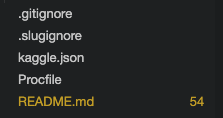

---

Run the below cell so the token is recognised by the session. 

In [10]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

---

Define Kaggle dataset, destination folder and download it

In [11]:
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "inputs/datasets/raws"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

  0%|                                               | 0.00/49.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 49.6k/49.6k [00:00<00:00, 5.24MB/s]


---

Unzip the downloaded file, delete the zip file and delete kaggle.json file

In [12]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
&& rm {DestinationFolder}/*.zip \
&& rm kaggle.json

Archive:  inputs/datasets/raws/housing-prices-data.zip
  inflating: inputs/datasets/raws/house-metadata.txt  
  inflating: inputs/datasets/raws/house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: inputs/datasets/raws/house-price-20211124T154130Z-001/house-price/inherited_houses.csv  


---

# Load and Inspect Kaggle data

In [6]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raws/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


DataFrame Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

There are totla 24 variables with one target variable, `SalePrice`. Some variables have missing values, especially with `EnclosedPorch` and `WoodDeckSF` have a significant number of missing values. 

---

Now, load the inherited houses data

In [8]:
import pandas as pd
df_inherited = pd.read_csv(f"inputs/datasets/raws/house-price-20211124T154130Z-001/house-price/inherited_houses.csv")
df_inherited.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


Check the info of the inherited_houses.csv

In [9]:
df_inherited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

There are no missing values for all columns. 

# Push files to Repo

Push the collected data to a new folder. The path is outputs/datasets/collection. 

In [14]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create a folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/house_prices_ames_iowa.csv",index=False)
df_inherited.to_csv(f"outputs/datasets/collection/inherited_houses.csv",index=False)

[Errno 17] File exists: 'outputs/datasets/collection'
